In [118]:
#import pandas as pd
from pandas import *
from pandas.plotting import scatter_matrix
from matplotlib.pyplot import *
from numpy import *
from scipy import *
from scipy import stats 
from sklearn import *
import seaborn as sn

In [119]:
#loading the data by providing the paths
url = r"C:\Users\akabanda\Desktop\PYTHON\DATA ANALYSIS\births-and-deaths-year-ended-december-2017\acme.csv"


In [120]:
data = read_csv(url)
datafr = DataFrame(data)

In [121]:
print(datafr)

    Number   month    market      acme
0        1  Jan-86 -0.061134  0.030160
1        2  Feb-86  0.008220 -0.165457
2        3  Mar-86 -0.007381  0.080137
3        4  Apr-86 -0.067561 -0.109917
4        5  May-86 -0.006238 -0.114853
5        6  Jun-86 -0.044251 -0.099254
6        7  Jul-86 -0.112070 -0.226846
7        8  Aug-86  0.030226  0.073445
8        9  Sep-86 -0.129556 -0.143064
9       10  Oct-86  0.001319  0.034776
10      11  Nov-86 -0.033679 -0.063375
11      12  Dec-86 -0.072795 -0.058735
12      13  Jan-87  0.073396  0.050214
13      14  Feb-87 -0.011618  0.111165
14      15  Mar-87 -0.026852 -0.127492
15      16  Apr-87 -0.040356  0.054522
16      17  May-87 -0.047539 -0.072918
17      18  Jun-87 -0.001732 -0.058979
18      19  Jul-87 -0.008899  0.236147
19      20  Aug-87 -0.020837 -0.094778
20      21  Sep-87 -0.084811 -0.135669
21      22  Oct-87 -0.262077 -0.284796
22      23  Nov-87 -0.110167 -0.171494
23      24  Dec-87  0.034955  0.242616
24      25  Jan-88  0.012

In [122]:
datafr.describe()

,Number,market,acme
count,60.000000,60.000000,60.000000
mean,30.500000,-0.051168,-0.068969
std,17.464249,0.053629,0.111572
min,1.000000,-0.262077,-0.284796
25%,15.750000,-0.079007,-0.133046
50%,30.500000,-0.044867,-0.089992
75%,45.250000,-0.011587,-0.031495
max,60.000000,0.073396,0.242616


In [123]:
#scatter_matrix(datafr)

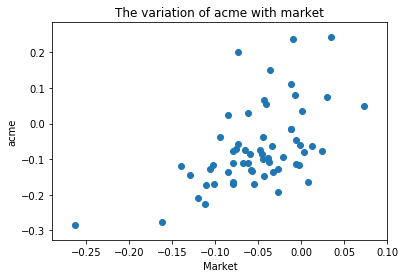

In [124]:
scatter(datafr['market'],datafr['acme'])
xlabel('Market')
ylabel('acme')
title('The variation of acme with market')
show()

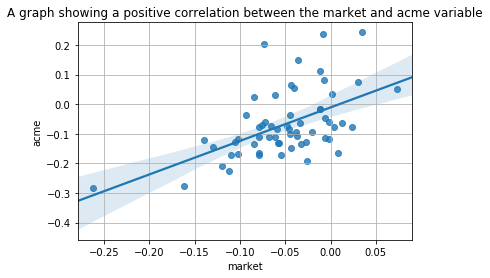

In [125]:
#The regression line shows a positive correlation between the market variable and the acme variable

x = datafr['market']
y = datafr['acme']
grid(True)
title('A graph showing a positive correlation between the market and acme variable')

sn.regplot(x,y)    #This regplot is a seaborn function

In [129]:
#Finding the pearson correlation coefficient and the P-value for this data

x = datafr['market']
y = datafr['acme']
    
Pearson_coef,p_value = stats.pearsonr(x,y)
print('The Pearson rank correlation is =',Pearson_coef, '\n\nThe P value =', p_value)

The Pearson rank correlation is = 0.5444279164960159 

The P value = 6.903101083120121e-06


The gradient of the best fit model = 1.1326574583182496 

The Y-intercept = -0.011013093375534353


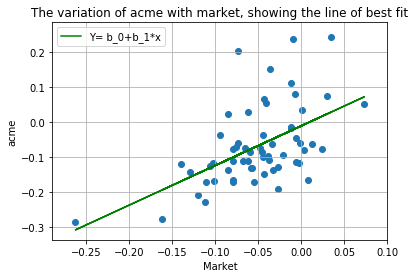

In [142]:
#predicting the model that fitis the data
#I will first use the polyfit function since the data seems to follow under a linear trend
#lets assume the model Y= b_0+b_1*x

(b_1,b_0) = polyfit(x,y,1)

print('The gradient of the best fit model =',b_1, '\n\nThe Y-intercept =',b_0)

Y= b_0+b_1*x

scatter(x,y)
plot(x,Y,'g')
xlabel('Market')
ylabel('acme')
title('The variation of acme with market, showing the line of best fit')
grid(True)
legend(['Y= b_0+b_1*x'], loc= 'best')
show()

The gradient of the best fit model = [[1.13265746]] 

The Y-intercept = [-0.01101309]


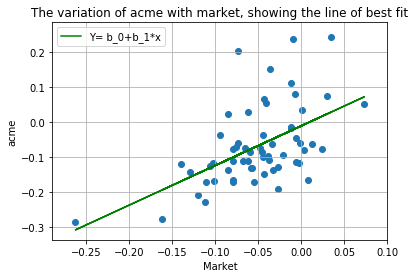

In [148]:
#predicting the model that fits the data
#I secondly use the lm.fit function since the data seems to follow under a linear trend
#lets assume the model Y= b_0+b_1*x

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

x = datafr[['market']]
y = datafr[['acme']]

lm.fit(x,y)

Y_ = lm.predict(x)

B_0 = lm.intercept_

B_1 = lm.coef_

print('The gradient of the best fit model =',B_1, '\n\nThe Y-intercept =',B_0)

scatter(x,y)
plot(x,Y,'g')
xlabel('Market')
ylabel('acme')
title('The variation of acme with market, showing the line of best fit')
grid(True)
legend(['Y= b_0+b_1*x'], loc= 'best')
show()


In [ ]:
#Based on the gradients and intercepts from the two ways of calculations, we can see that the numbers are the same implying that
#the model is the same